In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("Social_Network_Ads.csv")

In [7]:
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [9]:
df = df[["Age","EstimatedSalary","Purchased"]]

In [10]:
df.sample(5)

,Age,EstimatedSalary,Purchased
42,35,108000,0
176,35,47000,0
356,54,70000,1
124,41,51000,0
81,39,42000,0


# TRAIN TEST SPLIT

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train,X_test,y_train,y_test = train_test_split(df.drop("Purchased",axis = 1),
                                                df["Purchased"],
                                                test_size=0.3,
                                                random_state= 0)

In [17]:
X_train.shape

(280, 2)

In [18]:
y_train.shape

(280,)

# Standardization

In [23]:
from sklearn.preprocessing import StandardScaler

In [27]:
scaler = StandardScaler()
#iska scn ye hai kisi ek k oper rakh kar fit kardo tu standard scaler train hojata hai and then transform karsakte har kisi par fit karne ki zarorat nhi pare gi 
scaler.fit(X_train)

StandardScaler()

In [29]:
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [33]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)

In [34]:
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [37]:
np.round(X_train.describe(),1)

,Age,EstimatedSalary
count,280.0,280.0
mean,37.9,69807.1
std,10.2,34641.2
min,18.0,15000.0
25%,30.0,43000.0
50%,37.0,70500.0
75%,46.0,88000.0
max,60.0,150000.0


In [59]:
X_train_scaled_des = np.round(X_train_scaled.describe(),1)

In [57]:
highlight = lambda x: ["background :red" if x.name in ["mean","std"] else "" for i in x]

In [61]:
# See the mean and std is 0,1 after scaling
X_train_scaled_des.style.apply(highlight,axis = 1)

,Age,EstimatedSalary
count,280.000000,280.000000
mean,0.000000,0.000000
std,1.000000,1.000000
min,-1.900000,-1.600000
25%,-0.800000,-0.800000
50%,-0.100000,0.000000
75%,0.800000,0.500000
max,2.200000,2.300000


# EFFECT OF SCALLING

As you can see after scalling the data SPREAD is not effected but the scale change as the nature of scaling

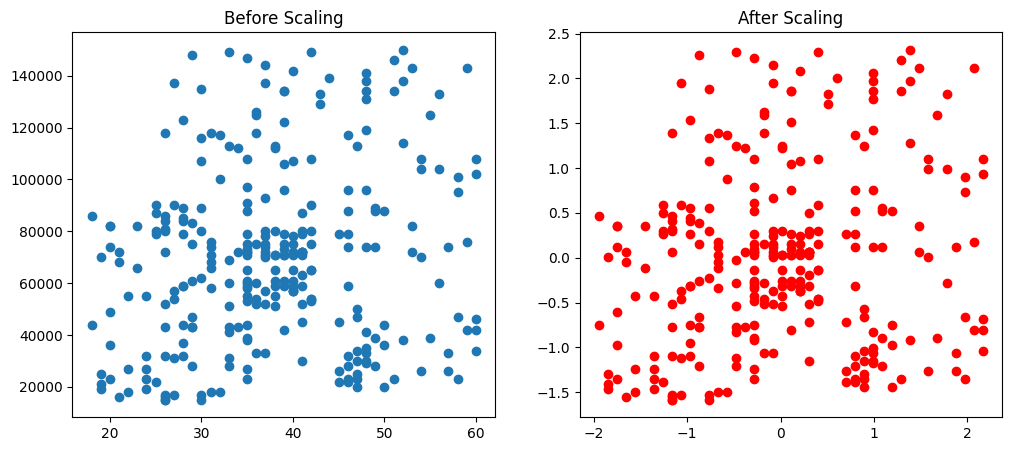

In [62]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

ax1.scatter(X_train['Age'], X_train['EstimatedSalary'])
ax1.set_title("Before Scaling")
ax2.scatter(X_train_scaled['Age'], X_train_scaled['EstimatedSalary'],color='red')
ax2.set_title("After Scaling")
plt.show()

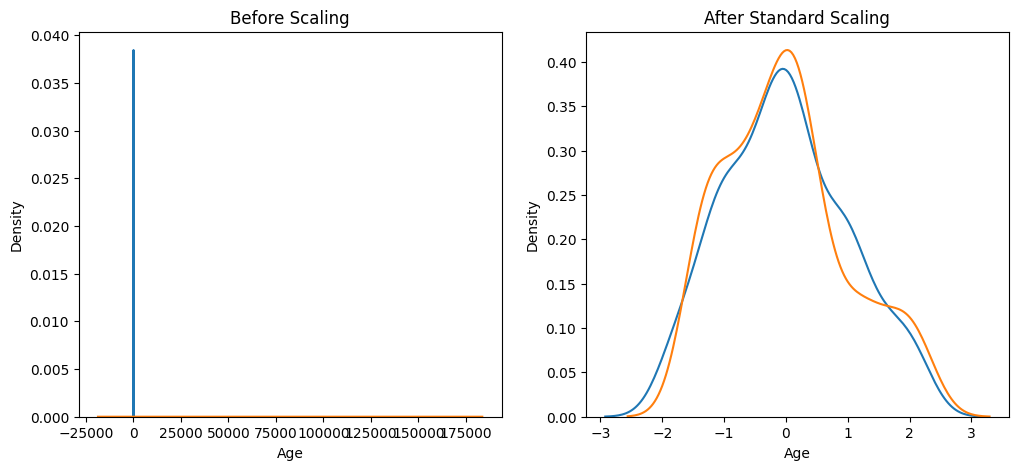

In [63]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Before Scaling')
sns.kdeplot(X_train['Age'], ax=ax1)
sns.kdeplot(X_train['EstimatedSalary'], ax=ax1)

# after scaling
ax2.set_title('After Standard Scaling')
sns.kdeplot(X_train_scaled['Age'], ax=ax2)
sns.kdeplot(X_train_scaled['EstimatedSalary'], ax=ax2)
plt.show()

# Comparison of Distributions

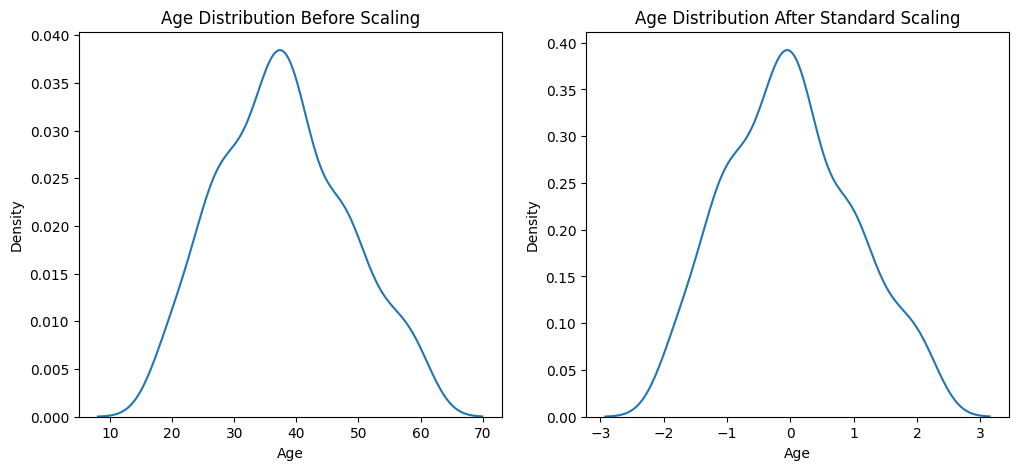

In [64]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Age Distribution Before Scaling')
sns.kdeplot(X_train['Age'], ax=ax1)

# after scaling
ax2.set_title('Age Distribution After Standard Scaling')
sns.kdeplot(X_train_scaled['Age'], ax=ax2)
plt.show()

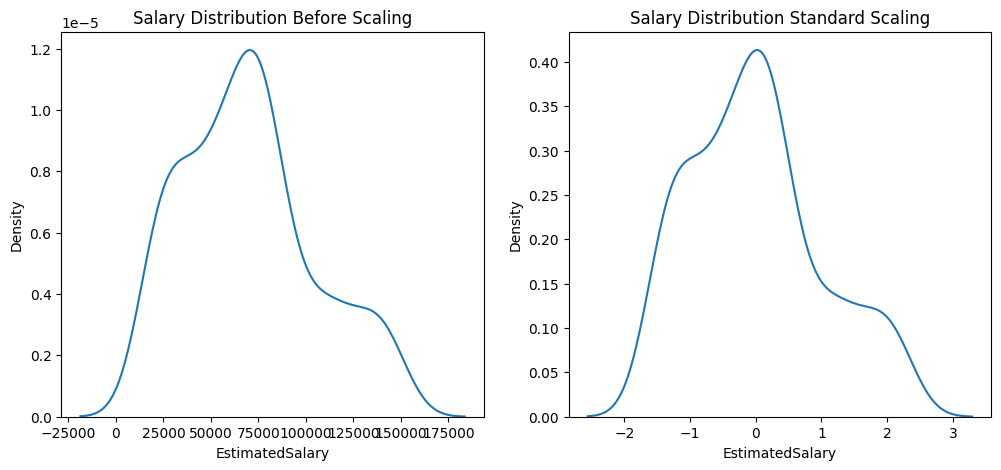

In [65]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Salary Distribution Before Scaling')
sns.kdeplot(X_train['EstimatedSalary'], ax=ax1)

# after scaling
ax2.set_title('Salary Distribution Standard Scaling')
sns.kdeplot(X_train_scaled['EstimatedSalary'], ax=ax2)
plt.show()

# USING LOGISTIC REGRESSION ALGO 

In [66]:
from sklearn.linear_model import LogisticRegression

In [68]:
lr = LogisticRegression()
lr_scaled = LogisticRegression()

In [69]:
lr.fit(X_train,y_train)
lr_scaled.fit(X_train_scaled,y_train)

LogisticRegression()

In [71]:
y_pred = lr.predict(X_test)
y_pred_scaled = lr_scaled.predict(X_test_scaled)

In [72]:
from sklearn.metrics import accuracy_score

In [74]:
#as you can see the accuracy score before and after scaling 
print("Actual",accuracy_score(y_test,y_pred))
print("Scaled",accuracy_score(y_test,y_pred_scaled))

Actual 0.6583333333333333
Scaled 0.8666666666666667


it is not nessacary to scale but in some algo it not give good prediction and in some it gives same prediction wheter it scaled or not

if we use Decission Tree it will not effect it 

In [76]:
from sklearn.tree import DecisionTreeClassifier

In [83]:
dc = DecisionTreeClassifier()
dc_scaled = DecisionTreeClassifier()

In [84]:
dc.fit(X_train,y_train)
dc_scaled.fit(X_train_scaled,y_train)

DecisionTreeClassifier()

In [85]:
ypred = dc.predict(X_test)
ypredScaled = dc_scaled.predict(X_test_scaled)

In [87]:
#as you can see the accuracy score before and after scaling its not effected
print("Actual",accuracy_score(y_test,ypred))
print("Scaled",accuracy_score(y_test,ypredScaled))

Actual 0.875
Scaled 0.8666666666666667


# EFFECT OF OUTLIER ON STANDARD SCALER

In [89]:
#Now we are giving dummy data and outlier one to dataset
df = df.append(pd.DataFrame({'Age':[5,90,95],'EstimatedSalary':[1000,250000,350000],'Purchased':[0,1,1]}),ignore_index=True)

C:\Users\1285-010-001\AppData\Local\Temp\ipykernel_6912\1306511587.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame({'Age':[5,90,95],'EstimatedSalary':[1000,250000,350000],'Purchased':[0,1,1]}),ignore_index=True)


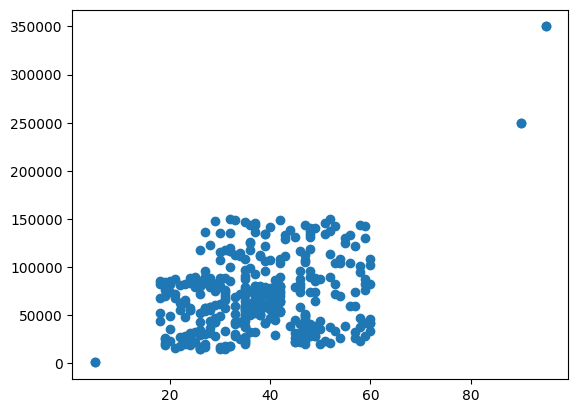

In [90]:
plt.scatter(df["Age"],df["EstimatedSalary"])

In [92]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop('Purchased', axis=1),
                                                    df['Purchased'],
                                                    test_size=0.3,
                                                    random_state=0)

X_train.shape, X_test.shape

((284, 2), (122, 2))

In [93]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# fit the scaler to the train set, it will learn the parameters
scaler.fit(X_train)

# transform train and test sets
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [94]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

As you can see ouliers cannot be effected by scaling you do some other techniques to handled them

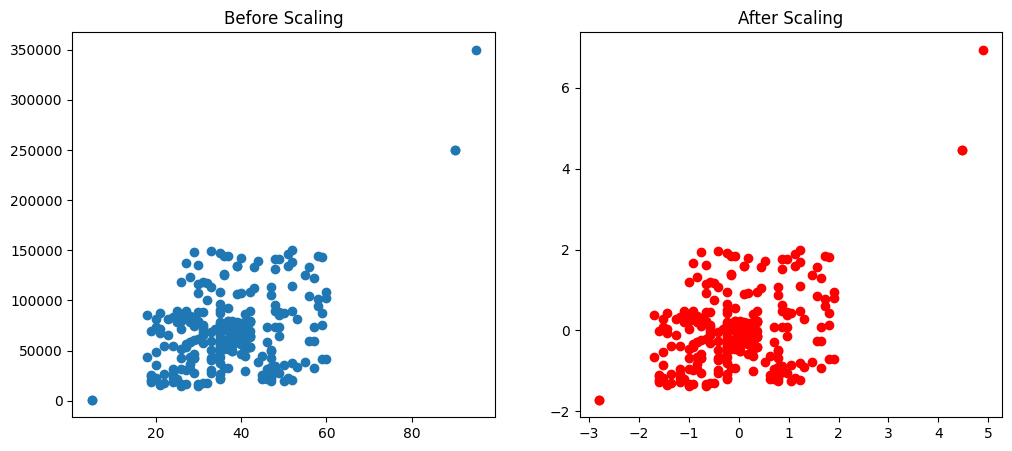

In [95]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

ax1.scatter(X_train['Age'], X_train['EstimatedSalary'])
ax1.set_title("Before Scaling")
ax2.scatter(X_train_scaled['Age'], X_train_scaled['EstimatedSalary'],color='red')
ax2.set_title("After Scaling")
plt.show()

# When to Use Standardization 

When you have to use these algos use standardization

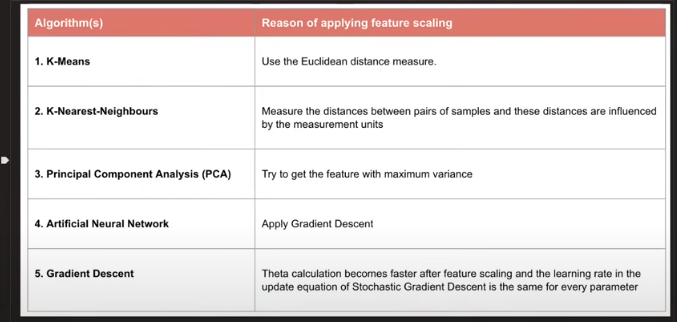